<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Get-data-and-clean-it" data-toc-modified-id="Get-data-and-clean-it-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get data and clean it</a></span></li><li><span><a href="#Categorical-columns" data-toc-modified-id="Categorical-columns-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical columns</a></span></li><li><span><a href="#Numerical-columns" data-toc-modified-id="Numerical-columns-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Numerical columns</a></span><ul class="toc-item"><li><span><a href="#Predicators" data-toc-modified-id="Predicators-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Predicators</a></span></li><li><span><a href="#Target-column" data-toc-modified-id="Target-column-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Target column</a></span></li></ul></li><li><span><a href="#Dealing-with-outliers" data-toc-modified-id="Dealing-with-outliers-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Dealing with outliers</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forest Regression</a></span><ul class="toc-item"><li><span><a href="#Getting-the-data-and-cleaning-it" data-toc-modified-id="Getting-the-data-and-cleaning-it-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Getting the data and cleaning it</a></span></li><li><span><a href="#Build-the-model-on-the-whole-dataset" data-toc-modified-id="Build-the-model-on-the-whole-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Build the model on the whole dataset</a></span></li><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Splitting the data</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model evaluation</a></span></li></ul></li></ul></div>

# Libraries

In [46]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

from scipy.stats import boxcox
from scipy.stats import zscore

from statsmodels.formula.api import ols
from statsmodels.api import OLS

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore', np.RankWarning)

# Linear Regression

## Get data and clean it 

In [79]:
df=pd.read_csv("/Users/etienneleconte/Downloads/forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**VARIABLES INFO**

* **X** - x-axis spatial coordinate within the Montesinho park map: 1 to 9
* **Y** - y-axis spatial coordinate within the Montesinho park map: 2 to 9
* **month** - month of the year: 'jan' to 'dec'
* **day** - day of the week: 'mon' to 'sun'
* **FFMC** - FFMC index from the FWI system: 18.7 to 96.20
* **DMC** - DMC index from the FWI system: 1.1 to 291.3
* **DC** - DC index from the FWI system: 7.9 to 860.6
* **ISI** - ISI index from the FWI system: 0.0 to 56.10
* **temp** - temperature in Celsius degrees: 2.2 to 33.30
* **RH** - relative humidity in %: 15.0 to 100
* **wind** - wind speed in km/h: 0.40 to 9.40
* **rain** - outside rain in mm/m2 : 0.0 to 6.4
* **area** - the burned area of the forest (in ha): 0.00 to 1090.84 --> (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In [4]:
df.columns[~df.columns.isin(df._get_numeric_data().columns)]

Index(['month', 'day'], dtype='object')

In [5]:
df.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [6]:
df.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [7]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [8]:
num_cols=df.drop('area',axis=1).select_dtypes(exclude='object').columns.to_list()
num_data=df[num_cols]

## Categorical columns

<AxesSubplot:xlabel='month', ylabel='area'>

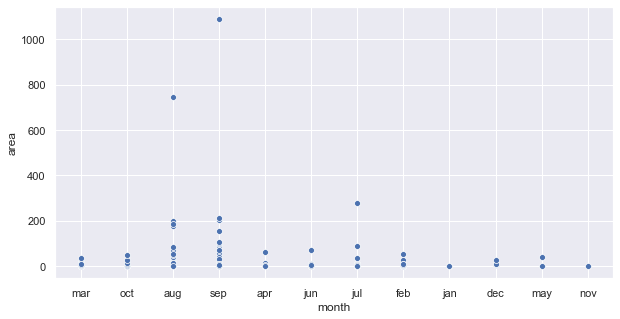

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.month,df.area)

<AxesSubplot:xlabel='day', ylabel='area'>

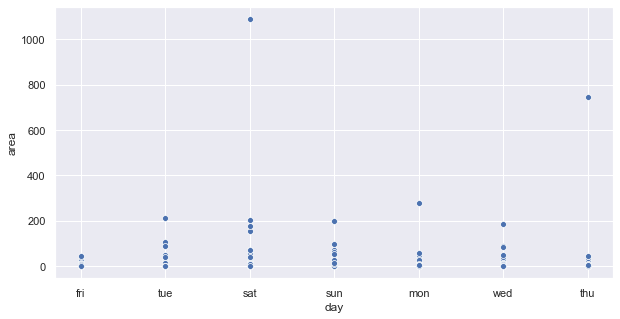

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.day,df.area)

## Numerical columns

### Predicators

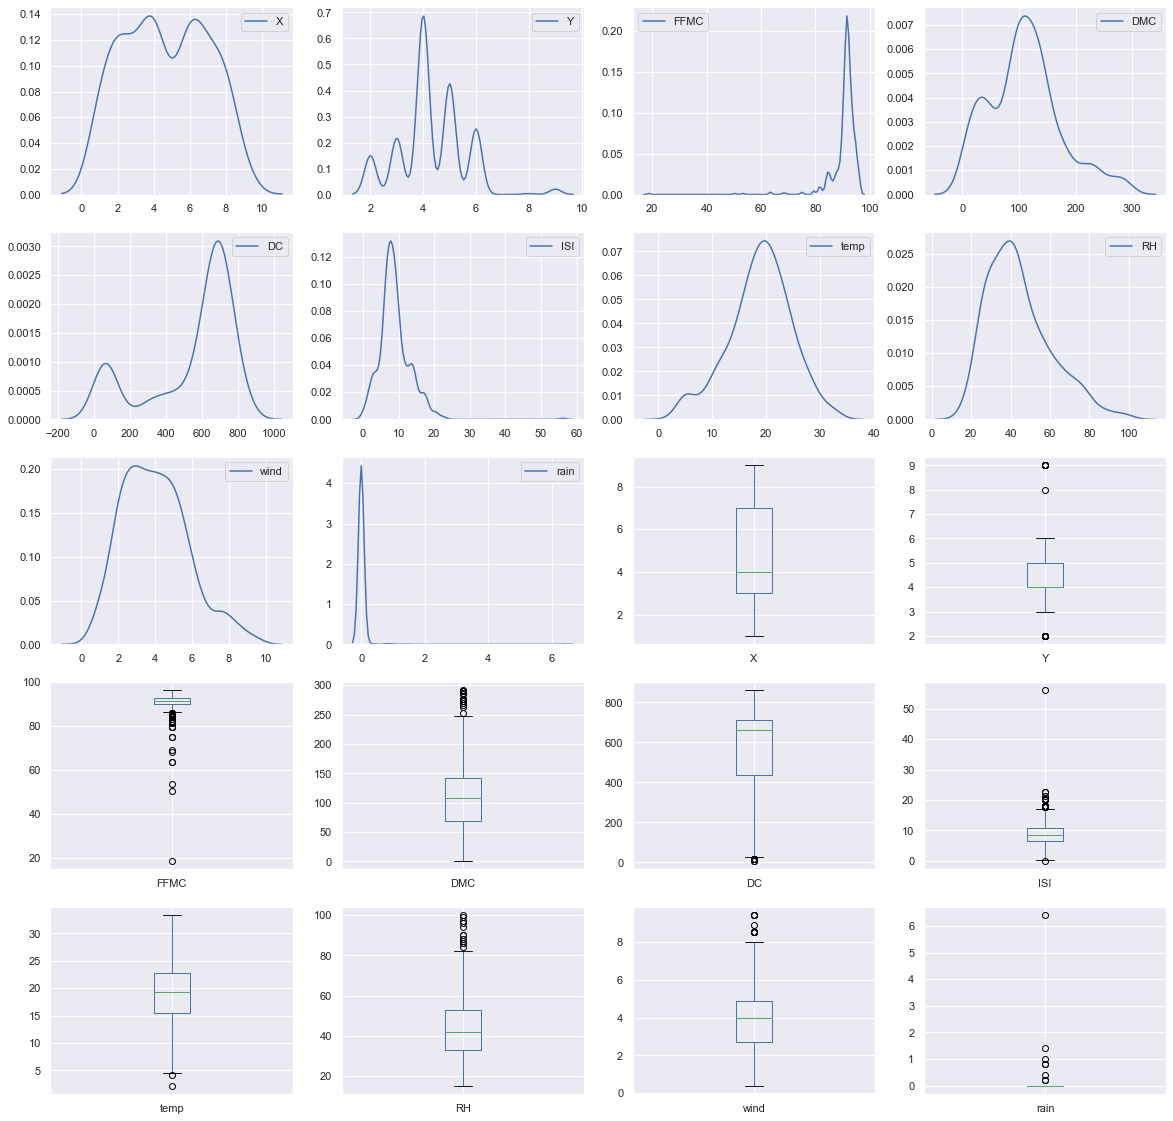

In [14]:
plt.figure(figsize=(20,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(5,4,i)
    sns.kdeplot(df[col])
    plt.subplot(5,4,i+10)
    df[col].plot.box()

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/numpy/lib/polynomial.py:628: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

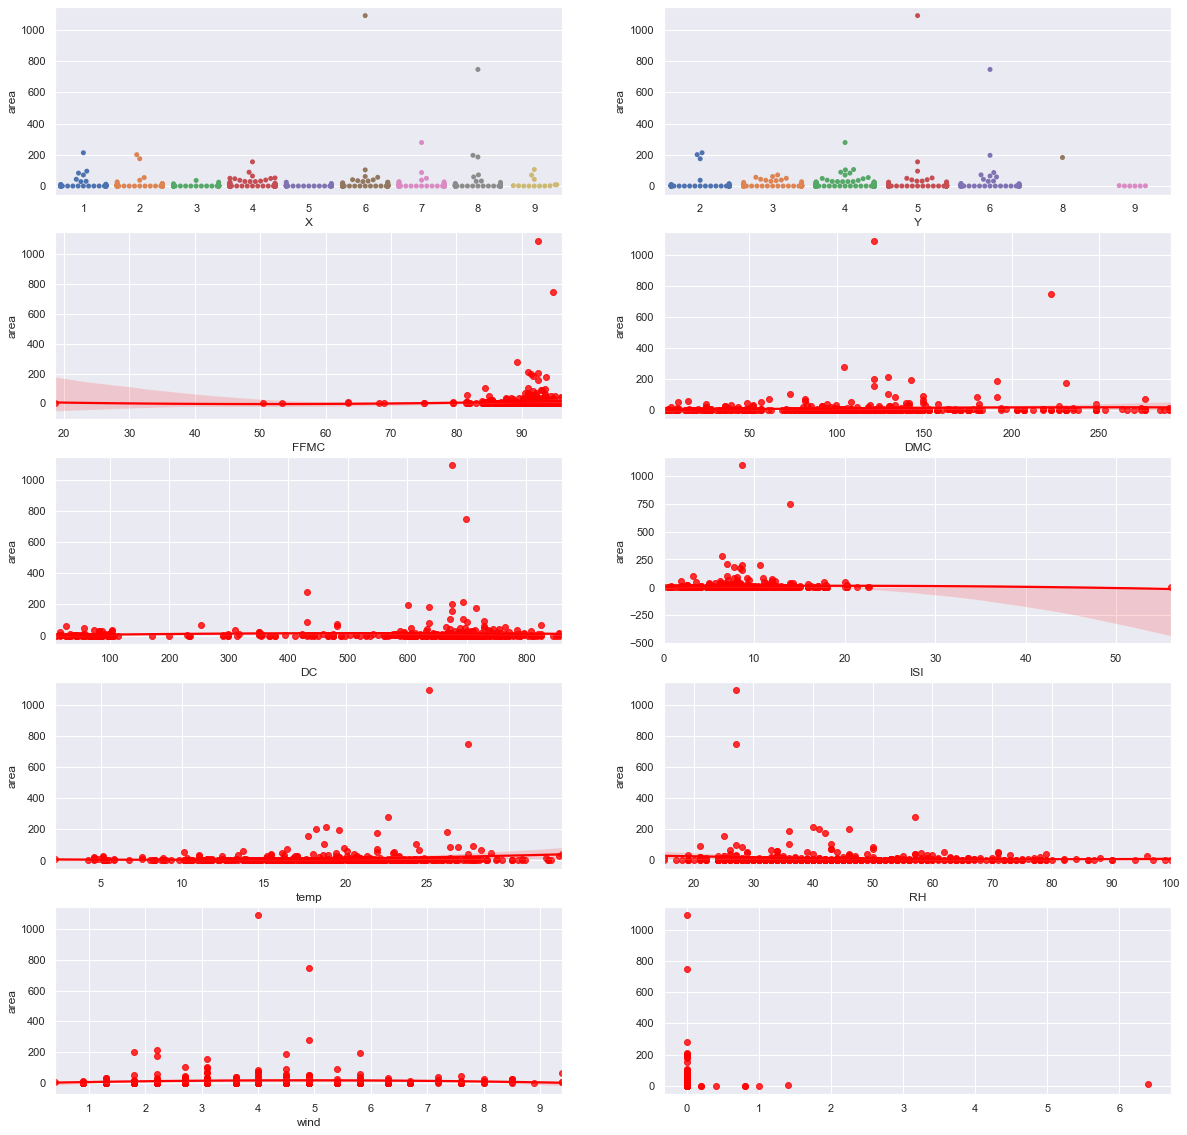

In [83]:
plt.figure(figsize=(20,20))

for i,col in enumerate(num_cols,1):
    plt.subplot(5,2,i)
    if col in ['X','Y']:
        sns.swarmplot(data=df,x=col,y=df.area)
    else:
        sns.regplot(x=col,y=df.area,data=df,order=2,color='red')
plt.show()



### Target column

In [15]:
df.area.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [16]:
df.area[df.area==0].count()

247

In [17]:
plt.rcParams["figure.figsize"] = 9,5

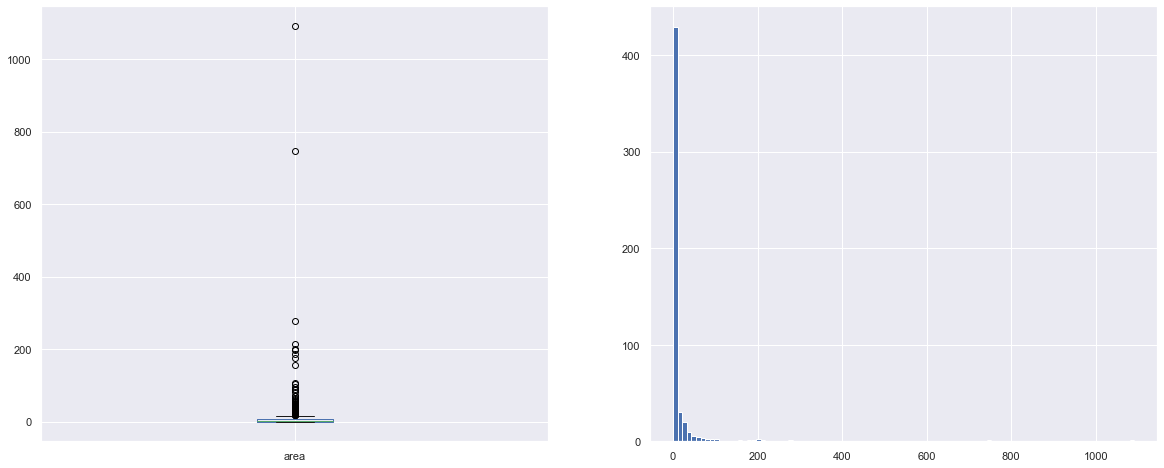

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df.area.plot.box()
plt.subplot(1,2,2)
plt.hist(df.area, bins=100)
plt.show()

We can notice that there are outliers in our target column, and most importantly, that it is higly skewed toward zero

<AxesSubplot:>

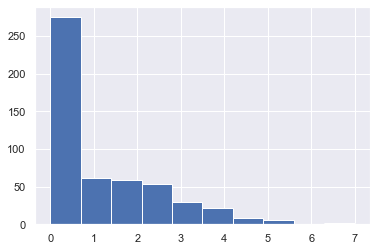

In [67]:
df.area.apply(np.log1p).hist()

In [20]:
df1=df.query('area>0')

<AxesSubplot:>

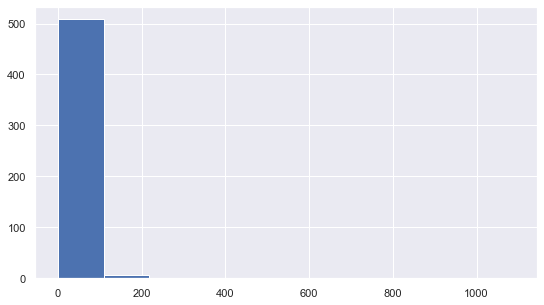

In [21]:
df.area.hist()

In [22]:
pd.cut(df.area, [-1,0.01,2,5,20,100,2000]).cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
512    3
513    4
514    3
515    0
516    0
Length: 517, dtype: int8

## Dealing with outliers

In [23]:
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
Skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
Kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [24]:
out_cols=['FFMC','ISI','rain']

In [25]:
pd.DataFrame(data=[np.log1p(df[out_cols]).skew(),np.log1p(df[out_cols]).kurtosis()],index=['Skewness','Kurtosis'])

,FFMC,ISI,rain
Skewness,-11.675394,-0.937218,14.173028
Kurtosis,185.482383,2.584588,234.240025


In [26]:
# Log transformation not enough to get normalized data for FFMC - let's drop outliers based on their zscore 

df=df.loc[~(abs(zscore(df.FFMC)) > 3)]

In [27]:
pd.DataFrame(data=[np.log1p(df[out_cols]).skew(),np.log1p(df[out_cols]).kurtosis()],index=['Skewness','Kurtosis'])

,FFMC,ISI,rain
Skewness,-1.803993,-0.434372,14.076080
Kurtosis,4.866747,1.122574,231.044213


In [28]:
df.FFMC=np.log1p(df.FFMC)
df.ISI=np.log1p(df.ISI)

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Still a problem for rain : lets analyze the values 

In [29]:
df.rain.value_counts()

0.0    502
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

## Modeling

In [96]:
df = pd.get_dummies(df,columns=['day','month'],drop_first=True)

KeyError: "None of [Index(['day', 'month'], dtype='object')] are in the [columns]"

In [98]:
y=np.log1p(df.area)
X=df.drop(['area'], axis=1)

In [97]:
model=OLS(y,X).fit().summary() # area with zeros included
model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   area   R-squared (uncentered):                   0.083
Model:                            OLS   Adj. R-squared (uncentered):              0.033
Method:                 Least Squares   F-statistic:                              1.645
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                      0.0228
Time:                        10:54:40   Log-Likelihood:                         -2868.4
No. Observations:                 517   AIC:                                      5791.
Df Residuals:                     490   BIC:                                      5905.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              2.2581      1.496      1.509      0.132      -0.682       5.198
Y             -0.2151      2.795     -0.077      0.939      -5.708       5.277
FFMC          -0.2304      0.356     -0.647      0.518      -0.930       0.469
DMC            0.2057      0.084      2.462      0.014       0.042       0.370
DC            -0.1304      0.058     -2.245      0.025      -0.245      -0.016
ISI           -0.4867      0.778     -0.626      0.532      -2.015       1.042
temp           1.2336      0.980      1.259      0.209      -0.692       3.159
RH            -0.1597      0.259     -0.616      0.538      -0.669       0.350
wind           1.9034      1.740      1.094      0.275      -1.516       5.322
rain          -2.5533      9.828     -0.260      0.795     -21.864      16.757
day_mon        5.7734     10.425      0.554      0.580     -14.709      26.256
day_sat       19.2277     10.010      1.921      0.055      -0.441      38.896
day_sun        4.9462      9.728      0.508      0.611     -14.167      24.060
day_thu        9.4525     11.041      0.856      0.392     -12.241      31.146
day_tue        7.5507     10.803      0.699      0.485     -13.676      28.777
day_wed        5.3459     11.374      0.470      0.639     -17.002      27.694
month_aug     47.1105     38.033      1.239      0.216     -27.618     121.839
month_dec     46.2356     36.459      1.268      0.205     -25.400     117.872
month_feb      4.1769     24.924      0.168      0.867     -44.794      53.147
month_jan      9.6491     50.085      0.193      0.847     -88.759     108.057
month_jul     28.9931     33.015      0.878      0.380     -35.875      93.861
month_jun      6.1809     30.188      0.205      0.838     -53.132      65.494
month_mar     -5.1249     22.944     -0.223      0.823     -50.207      39.957
month_may     12.4591     50.837      0.245      0.806     -87.427     112.345
month_nov     -6.4696     67.516     -0.096      0.924    -139.126     126.187
month_oct     69.2499     45.354      1.527      0.127     -19.863     158.363
month_sep     74.0133     42.611      1.737      0.083      -9.710     157.737
==============================================================================
Omnibus:                      963.846   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           729940.266
Skew:                          12.278   Prob(JB):                         0.00
Kurtosis:                     185.434   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the c

In [68]:
y=np.log1p(df.area)
X=df.drop(['area'], axis=1)

In [99]:
from statsmodels.api import add_constant
model=OLS(y,add_constant(X)).fit().summary()
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.453
Date:                Mon, 05 Oct 2020   Prob (F-statistic):             0.0676
Time:                        10:55:06   Log-Likelihood:                -886.52
No. Observations:                 517   AIC:                             1829.
Df Residuals:                     489   BIC:                             1948.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5705      1.657     -0.344      0.731      -3.826       2.684
X              0.0524      0.032      1.617      0.106      -0.011       0.116
Y             -0.0185      0.061     -0.303      0.762      -0.138       0.101
FFMC           0.0075      0.017      0.448      0.655      -0.025       0.040
DMC            0.0042      0.002      2.225      0.027       0.000       0.008
DC            -0.0020      0.001     -1.578      0.115      -0.005       0.000
ISI           -0.0148      0.018     -0.823      0.411      -0.050       0.021
temp           0.0360      0.022      1.616      0.107      -0.008       0.080
RH             0.0007      0.006      0.107      0.915      -0.012       0.013
wind           0.0603      0.038      1.567      0.118      -0.015       0.136
rain           0.0309      0.215      0.144      0.886      -0.391       0.453
day_mon        0.1458      0.227      0.643      0.521      -0.300       0.591
day_sat        0.3099      0.218      1.423      0.155      -0.118       0.738
day_sun        0.2110      0.212      0.996      0.320      -0.205       0.627
day_thu        0.0722      0.240      0.301      0.764      -0.400       0.544
day_tue        0.3223      0.235      1.369      0.172      -0.140       0.785
day_wed        0.1979      0.247      0.802      0.423      -0.287       0.683
month_aug      0.3274      0.824      0.397      0.691      -1.292       1.947
month_dec      2.2051      0.800      2.758      0.006       0.634       3.776
month_feb      0.1886      0.561      0.336      0.737      -0.915       1.292
month_jan     -0.3164      1.221     -0.259      0.796      -2.715       2.082
month_jul      0.0992      0.715      0.139      0.890      -1.306       1.504
month_jun     -0.2862      0.656     -0.436      0.663      -1.576       1.004
month_mar     -0.3416      0.507     -0.674      0.500      -1.337       0.654
month_may      0.7175      1.102      0.651      0.515      -1.447       2.882
month_nov     -1.1031      1.480     -0.746      0.456      -4.010       1.804
month_oct      0.8233      0.983      0.838      0.403      -1.108       2.754
month_sep      0.9934      0.923      1.076      0.283      -0.821       2.808
==============================================================================
Omnibus:                       78.644   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.525
Skew:                           1.087   Prob(JB):                     6.06e-25
Kurtosis:                       3.673   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indi

In [100]:
print('MAE:',metrics.mean_absolute_error(y,OLS(y,add_constant(X)).fit().predict()))
print('MSE:',metrics.mean_squared_error(y,OLS(y,add_constant(X)).fit().predict()))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,OLS(y,add_constant(X)).fit().predict())))

MAE: 1.0988830499502713
MSE: 1.8068974389191816
RMSE: 1.3442088524180986


In [101]:
from Assumptions import Assumption_Tester_OLS as ast

Fitting linear regression

R^2: 0.07425967860549865 

Coefficients
-------------------------------------
Intercept: -0.5705459576982881
X: 0.05
Y: -0.02
FFMC: 0.01
DMC: 0.0
DC: -0.0
ISI: -0.01
temp: 0.04
RH: 0.0
wind: 0.06
rain: 0.03
day_mon: 0.15
day_sat: 0.31
day_sun: 0.21
day_thu: 0.07
day_tue: 0.32
day_wed: 0.2
month_aug: 0.33
month_dec: 2.21
month_feb: 0.19
month_jan: -0.32
month_jul: 0.1
month_jun: -0.29
month_mar: -0.34
month_may: 0.72
month_nov: -1.1
month_oct: 0.82
month_sep: 0.99

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


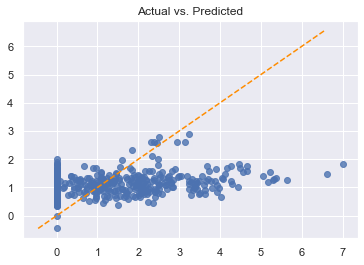

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with area


X       0.061995
Y       0.038838
FFMC    0.046799
DMC     0.067153
DC      0.066360
ISI    -0.010347
temp    0.053487
RH     -0.053662
wind    0.066973
rain    0.023311
Name: area, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with area


Series([], Name: area, dtype: float64)


Assumption 2: Little to no multicollinearity among predictors


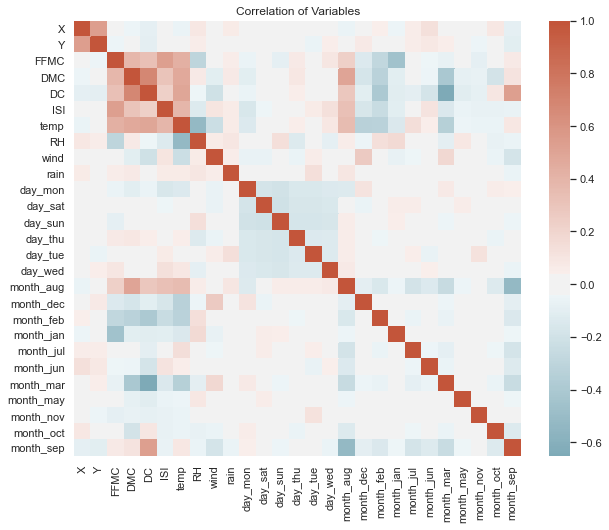

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
DC: 154.9299025454211
FFMC: 132.67055802017668
month_sep: 76.69452554635471
month_aug: 65.36261275628003
temp: 47.625000805895084
Y: 19.841135637707342
RH: 18.996778737423412
DMC: 14.522452685464236
month_jul: 8.565584986846922
ISI: 7.849599834881827
X: 7.716789588378199
month_oct: 7.577362691097975
wind: 7.4372710599275464
month_mar: 6.9813204685893195
month_jun: 3.80449572829673
month_feb: 3.051012341576983
month_dec: 2.937974258923842
day_sun: 2.2076897593902127
day_sat: 2.067050073770356
day_mon: 1.9748557852213922
day_tue: 1.8343842062331965
day_thu: 1.8260590160712737
day_wed: 1.7156378906571679
month_may: 1.2693543348819287
month_jan: 1.2320676091015783
month_nov: 1.1194449763046899
rain: 1.0778896917429939

8 cases of possible multicollinearity
2 cases of definite multicollinearity

Assumption not s

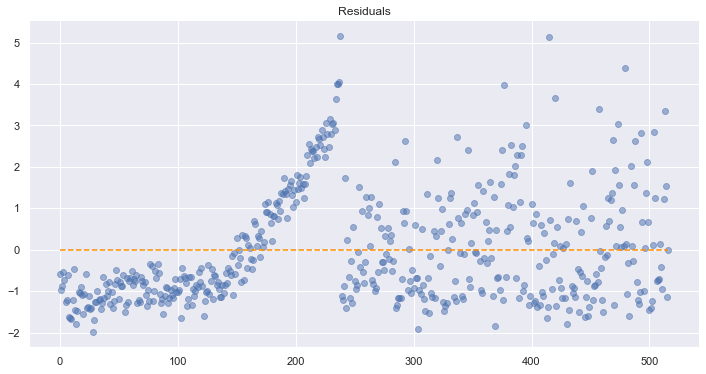

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 174.76721746748137,
 'pvalue for LM': 5.36867873743374e-24,
 'F stats': 9.267672519765414,
 'pvalue for Fstats': 1.0945675778739649e-29}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


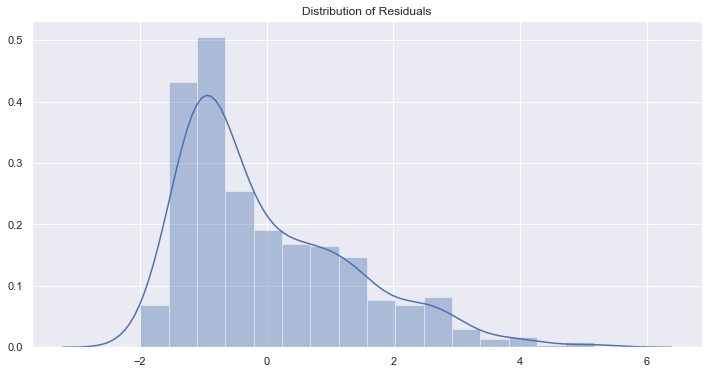


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


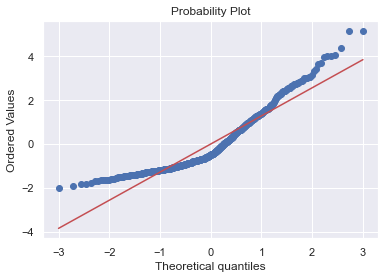


In your dataset you quite fat tails. You have 0.021 potential outliers (11 rows)


{'Satisfied': [],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Linearity',
  'Multicollinearity',
  'Autocorrelation',
  'Normality']}

In [102]:
ast(X,y).run_all()

# Random Forest Regression

## Getting the data and cleaning it

In [50]:
df=pd.read_csv("/Users/etienneleconte/Downloads/forestfires.csv")

In [51]:
df=pd.get_dummies(df,columns=['day','month'],drop_first=True)

In [52]:
#df=df.loc[~(abs(zscore(df.FFMC)) > 3)]
df.FFMC=np.log1p(df.FFMC)
df.ISI=np.log1p(df.ISI)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


## Build the model on the whole dataset 

In [90]:
X = df.drop('area',axis=1)
y = df.area

In [72]:
trees=[10]+list(range(50,550,50))
MAE=[]
MSE=[]
RMSE=[]

for tree in trees:
    rf=RandomForestRegressor(n_estimators=tree, random_state=42)
    rf.fit(X,np.log1p(y))
    MAE.append(metrics.mean_absolute_error(np.log1p(y),rf.predict(X)))
    MSE.append(metrics.mean_squared_error(np.log1p(y),rf.predict(X)))
    RMSE.append(np.sqrt(metrics.mean_squared_error(np.log1p(y),rf.predict(X))))
    
metric=pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=trees).T
metric

,MAE,MSE,RMSE
10,0.449149,0.395518,0.628902
50,0.435008,0.301092,0.548719
100,0.434948,0.293553,0.541806
150,0.437818,0.295897,0.543964
200,0.436964,0.293378,0.541644
250,0.437526,0.293280,0.541553
300,0.438491,0.294694,0.542857
350,0.438954,0.296769,0.544765
400,0.439577,0.298065,0.545953
450,0.438538,0.296740,0.544738


In [73]:
metric.describe().T['min']

MAE     0.434948
MSE     0.293280
RMSE    0.541553
Name: min, dtype: float64

In [91]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)

In [92]:
rf.fit(X,np.log1p(y))

RandomForestRegressor(random_state=42)

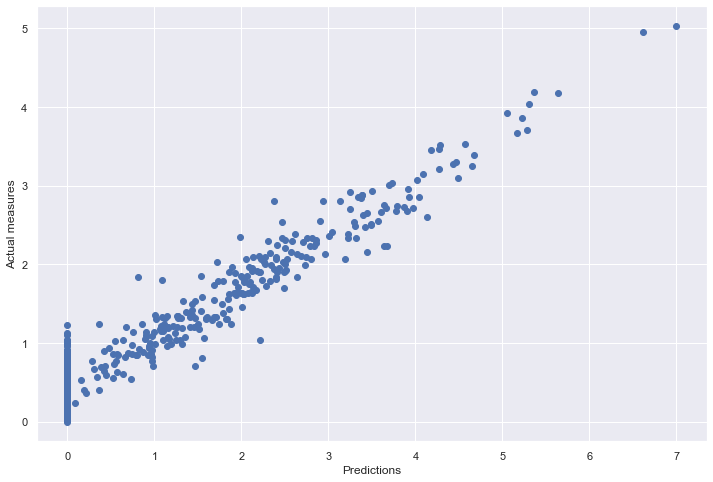

In [95]:
plt.figure(figsize=(12,8))

plt.scatter(np.log1p(y),rf.predict(X))

plt.xlabel('Predictions')
plt.ylabel('Actual measures')

plt.savefig('result_whole.png')

In [77]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.18
Variable: RH                   Importance: 0.12
Variable: DMC                  Importance: 0.11
Variable: X                    Importance: 0.09
Variable: DC                   Importance: 0.09
Variable: wind                 Importance: 0.09
Variable: ISI                  Importance: 0.08
Variable: Y                    Importance: 0.06
Variable: FFMC                 Importance: 0.06
Variable: day_sat              Importance: 0.02
Variable: day_mon              Importance: 0.01
Variable: day_sun              Importance: 0.01
Variable: day_thu              Importance: 0.01
Variable: day_tue              Importance: 0.01
Variable: day_wed              Importance: 0.01
Variable: month_aug            Importance: 0.01
Variable: month_dec            Importance: 0.01
Variable: month_jul            Importance: 0.01
Variable: month_may            Importance: 0.01
Variable: month_sep            Importance: 0.01
Variable: rain                 Importanc

## Splitting the data

In [104]:
X = df.drop('area',axis=1)
y = df.area

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=1/3, random_state=42)

## Training the model 

In [106]:
rf=RandomForestRegressor(n_estimators=300, random_state=42)

In [107]:
rf.fit(X_train,np.log1p(y_train))

RandomForestRegressor(n_estimators=300, random_state=42)

## Model evaluation

In [60]:
trees=[10]+list(range(50,550,50))
MAE=[]
MSE=[]
RMSE=[]

for tree in trees:
    rf=RandomForestRegressor(n_estimators=tree, random_state=42)
    rf.fit(X_train,np.log1p(y_train))
    MAE.append(metrics.mean_absolute_error(np.log1p(y_test),rf.predict(X_test)))
    MSE.append(metrics.mean_squared_error(np.log1p(y_test),rf.predict(X_test)))
    RMSE.append(np.sqrt(metrics.mean_squared_error(np.log1p(y_test),rf.predict(X_test))))
    
metric=pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=trees).T
metric

,MAE,MSE,RMSE
10,1.224679,2.383546,1.543874
50,1.225953,2.274540,1.508158
100,1.208671,2.219391,1.489762
150,1.208976,2.219505,1.489800
200,1.207500,2.210544,1.486790
250,1.202929,2.207998,1.485934
300,1.201030,2.196281,1.481985
350,1.204576,2.207687,1.485829
400,1.206649,2.217934,1.489273
450,1.207335,2.219278,1.489724


In [61]:
metric.describe().T['min']

MAE     1.201030
MSE     2.196281
RMSE    1.481985
Name: min, dtype: float64

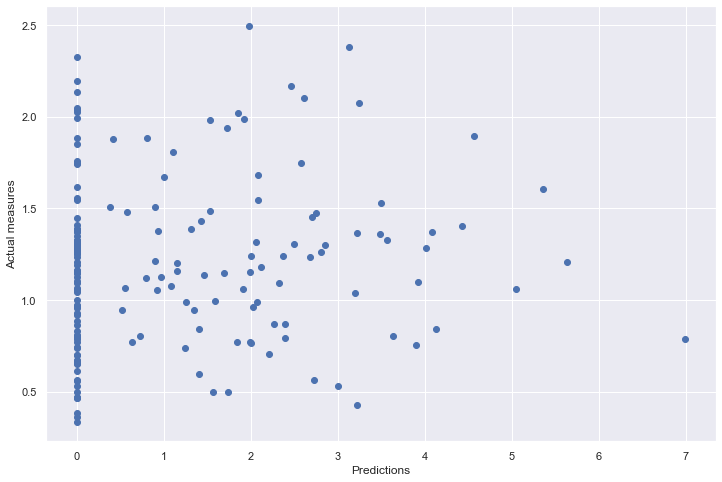

In [109]:
plt.figure(figsize=(12,8))

plt.scatter(np.log1p(y_test),rf.predict(X_test))

plt.xlabel('Predictions')
plt.ylabel('Actual measures')

plt.savefig('result_whole.png')

In [59]:
#def mean_absolute_percentage_error(y_true, y_pred): 
 #   y_true, y_pred = np.array(y_true), np.array(y_pred)
  #  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#mean_absolute_percentage_error(y, rf.predict(X))

In [65]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.18
Variable: RH                   Importance: 0.12
Variable: DMC                  Importance: 0.1
Variable: X                    Importance: 0.09
Variable: DC                   Importance: 0.09
Variable: ISI                  Importance: 0.08
Variable: wind                 Importance: 0.08
Variable: Y                    Importance: 0.07
Variable: FFMC                 Importance: 0.07
Variable: day_sat              Importance: 0.02
Variable: day_mon              Importance: 0.01
Variable: day_sun              Importance: 0.01
Variable: day_thu              Importance: 0.01
Variable: day_tue              Importance: 0.01
Variable: day_wed              Importance: 0.01
Variable: month_aug            Importance: 0.01
Variable: month_dec            Importance: 0.01
Variable: month_may            Importance: 0.01
Variable: month_sep            Importance: 0.01
Variable: rain                 Importance: 0.0
Variable: month_feb            Importance:

The best model we get is when we use 300 trees/estimators to build it 